In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data= pd.read_csv("iplauction2023.csv")


In [4]:
data.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [5]:
data.tail()


,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED
308,Axar Patel,Allrounder,India,NaN,900.0,DC,RETAINED


In [7]:
data.columns


Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [10]:
data.shape


(309, 7)

In [11]:
data.dtypes

name                      object
player style              object
nationality               object
base price (in lacs)     float64
final price (in lacs)    float64
franchise                 object
status                    object
dtype: object

In [12]:
data.nunique()

name                     309
player style               4
nationality               14
base price (in lacs)       8
final price (in lacs)     67
franchise                 10
status                     3
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [13]:
data.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


# Cleaning the data

In [19]:
d1=data.isnull().sum()
d1

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

In [17]:
d2=(d1/len(data))*100
d2

name                     0.000000
player style             0.000000
nationality              0.000000
base price (in lacs)     5.355273
final price (in lacs)    2.406484
franchise                2.406484
status                   0.000000
dtype: float64

In [20]:
m=pd.concat([d1,d2],axis=1,keys=['Total','Missing(%)'])
m

,Total,Missing(%)
name,0,0.000000
player style,0,0.000000
nationality,0,0.000000
base price (in lacs),158,5.355273
final price (in lacs),71,2.406484
franchise,71,2.406484
status,0,0.000000


In [22]:
data[data['franchise'].isnull()]

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
6,Prashant Chopra,Allrounder,India,20.0,NaN,NaN,UNSOLD
10,Luke Wood,Bowler,England,100.0,NaN,NaN,UNSOLD
11,Dilshan Madushanka,Bowler,Sri Lanka,50.0,NaN,NaN,UNSOLD
...,...,...,...,...,...,...,...
137,Mujeeb Ur Rahman,Bowler,Afghanistan,100.0,NaN,NaN,UNSOLD
138,Tabraiz Shamsi,Bowler,South Africa,100.0,NaN,NaN,UNSOLD
141,Adam Milne,Bowler,New Zealand,200.0,NaN,NaN,UNSOLD
143,Chris Jordan,Bowler,England,200.0,NaN,NaN,UNSOLD


In [23]:
df = data.copy()

# Renaming columns for consistency
df.rename(columns={'player style': 'player_style', 'base price (in lacs)': 'base_price', 'final price (in lacs)': 'final_price'}, inplace=True)

In [24]:
df

,name,player_style,nationality,base_price,final_price,franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


In [25]:
df['status'][df['franchise'].isnull() & df['final_price'].isnull()].value_counts()

status
UNSOLD    71
Name: count, dtype: int64

In [27]:
df.dropna(subset=['franchise','final_price'],inplace=True)
df

,name,player_style,nationality,base_price,final_price,franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
7,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


In [29]:
df.isnull().sum()

name              0
player_style      0
nationality       0
base_price      158
final_price       0
franchise         0
status            0
dtype: int64

# Visualizing the distribution of player styles by base price

<Axes: xlabel='player_style', ylabel='count'>

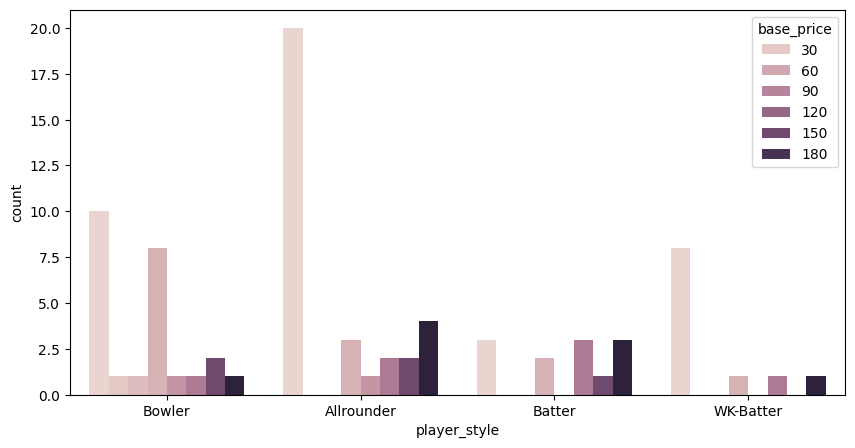

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(data=df,x=df.player_style,hue=df['base_price'])

Base Salary of all rounders counts:
 base_price
20.0     20
200.0     4
50.0      3
150.0     2
100.0     2
75.0      1
Name: count, dtype: int64


<Axes: xlabel='base_price'>

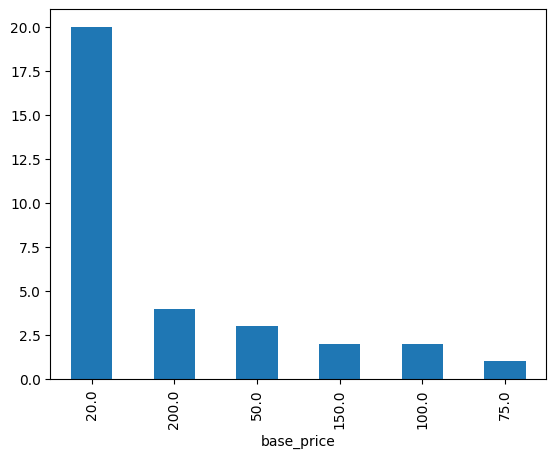

In [40]:

print('Base Salary of all rounders counts:\n',df['base_price'][df['player_style']=='Allrounder'].value_counts())
df['base_price'][df['player_style']=="Allrounder"].value_counts().plot(kind="bar")

In [41]:
df.player_style.value_counts()

player_style
Bowler        87
Allrounder    77
Batter        44
WK-Batter     30
Name: count, dtype: int64

In [45]:
df['player_style'][(df['player_style']=="Allrounder" ) &(df['base_price'].isnull())].value_counts()

player_style
Allrounder    45
Name: count, dtype: int64

In [51]:
df.loc[(df['player_style'] == 'Allrounder') & (df['base_price'].isnull()), 'base_price'] = 20

In [53]:
df

,name,player_style,nationality,base_price,final_price,franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
7,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,20.0,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


In [54]:
df['base_price'].fillna(df['base_price'].mean(), inplace=True)

In [56]:
#cleaned data
df.isnull().sum()

name            0
player_style    0
nationality     0
base_price      0
final_price     0
franchise       0
status          0
dtype: int64

In [58]:
df.describe()

,base_price,final_price
count,238.000000,238.000000
mean,47.120000,368.067227
std,38.325345,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,47.120000,150.000000
75%,47.120000,625.000000
max,200.000000,1850.000000


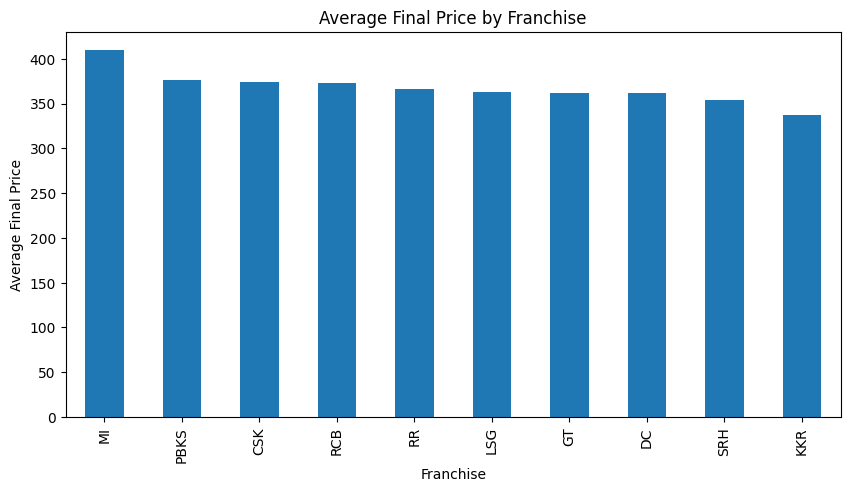

In [66]:
franchise_spending = df.groupby('franchise')['final_price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
franchise_spending.plot(kind='bar')
plt.xlabel('Franchise')
plt.ylabel('Average Final Price')
plt.title('Average Final Price by Franchise')
plt.show()

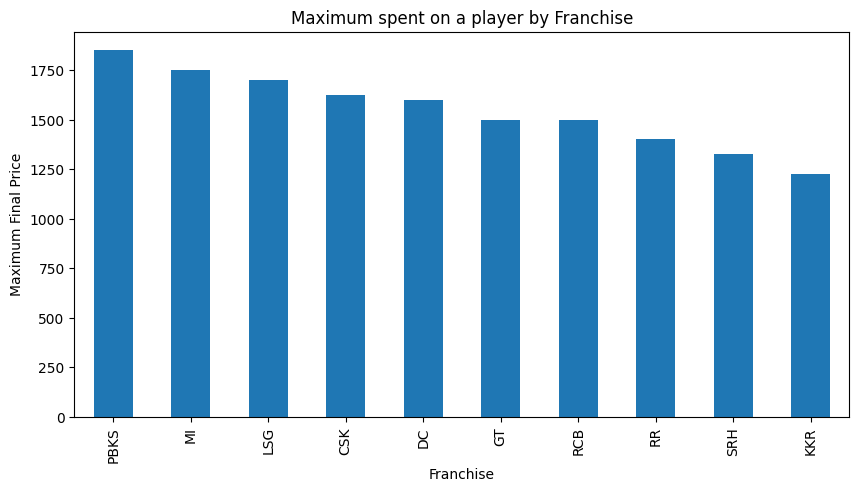

In [67]:
franchise_spending=df.groupby('franchise')['final_price'].max().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
franchise_spending.plot(kind='bar')
plt.xlabel('Franchise')
plt.ylabel('Maximum Final Price')
plt.title('Maximum spent on a player by Franchise')
plt.show()

# Player Styles cost

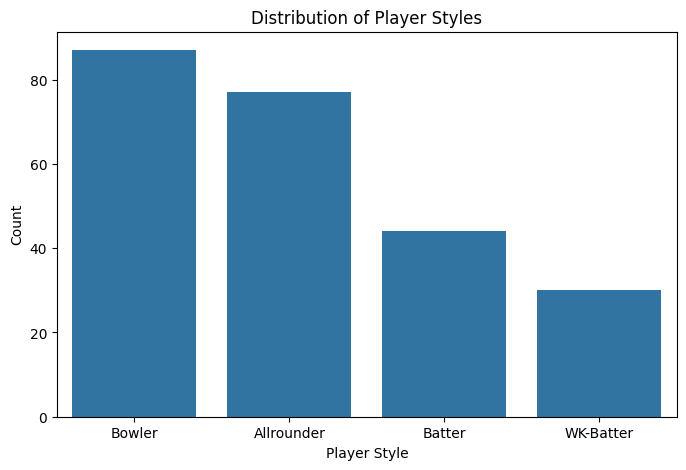

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='player_style')
plt.xlabel('Player Style')
plt.ylabel("Count")
plt.title('Distribution of Player Styles')
plt.show()

In [78]:
df.groupby(['player_style'])['final_price'].describe()

,count,mean,std,min,25%,50%,75%,max
player_style,,,,,,,,
Allrounder,77.0,376.298701,485.561532,20.0,20.00,100.0,650.00,1850.0
Batter,44.0,425.113636,441.586053,20.0,50.00,260.0,781.25,1600.0
Bowler,87.0,290.344828,350.931313,20.0,30.00,120.0,420.00,1500.0
WK-Batter,30.0,488.666667,581.006756,20.0,31.25,170.0,675.00,1700.0


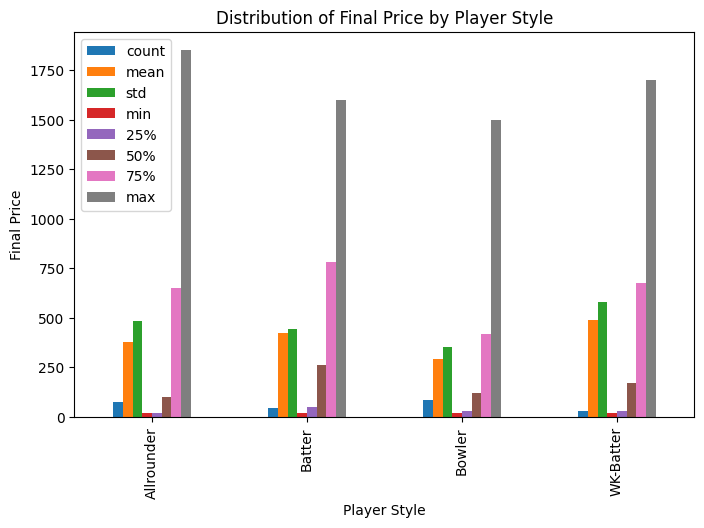

In [79]:
player_style_cost = df.groupby('player_style')['final_price'].describe()

player_style_cost.plot(kind='bar', figsize=(8,5))
plt.xlabel('Player Style')
plt.ylabel('Final Price')
plt.title('Distribution of Final Price by Player Style')
plt.show()